/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


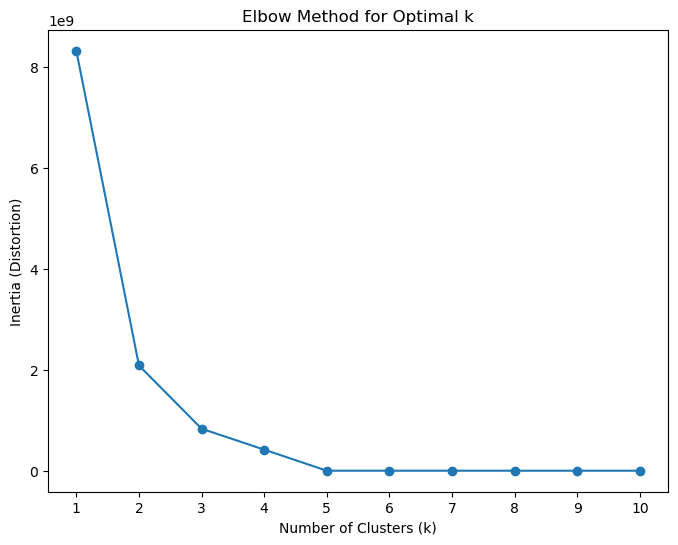

Optimal number of clusters (k): 2


In [ ]:
import cudf
import numpy as np
import matplotlib.pyplot as plt
from cuml.cluster import KMeans  # Use cuml for GPU acceleration

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the datasets (assuming these are already loaded in your environment)
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 1000000 rows from the combined dataset
sample_data = all_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# ---------------------------
# 2. Apply Elbow Method
# ---------------------------
distortions = []  # Store inertia values
K_range = range(1, 11)  # Test k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Inertia = sum of squared distances to cluster centers

# ---------------------------
# 3. Plot Elbow Curve
# ---------------------------
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.show()

# ---------------------------
# 4. Calculate Optimal k (Elbow Point)
# ---------------------------
# Calculate the "elbow" by finding the maximum change in inertia
delta_inertia = np.diff(distortions)
optimal_k = np.argmin(delta_inertia) + 2  # Add 2 because np.diff reduces size by 1
print(f"Optimal number of clusters (k): {optimal_k}")


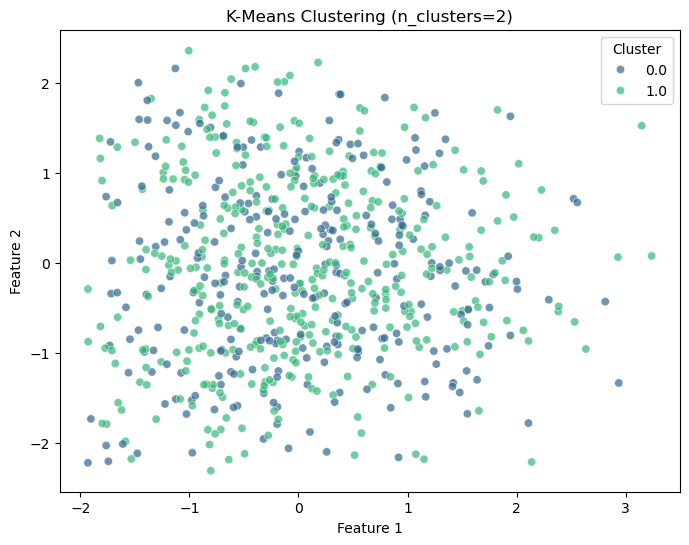

CPU times: user 1min 38s, sys: 1.58 s, total: 1min 39s
Wall time: 1min 45s


In [10]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.cluster import KMeans  # GPU-accelerated KMeans

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the datasets (assuming these are already loaded in your environment)
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 1000 rows from the combined dataset
sample_data = all_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# ---------------------------
# 2. Apply K-Means Clustering
# ---------------------------
n_clusters = 2  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# ---------------------------
# 3. Add Cluster Labels
# ---------------------------
all_train["Cluster"] = cluster_labels

# ---------------------------
# 4. Visualize Clusters (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0].to_pandas(),  # First feature
                y=X.iloc[:, 1].to_pandas(),  # Second feature
                hue=cluster_labels.to_pandas(),
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering (n_clusters={n_clusters})")
plt.legend(title="Cluster")
plt.show()


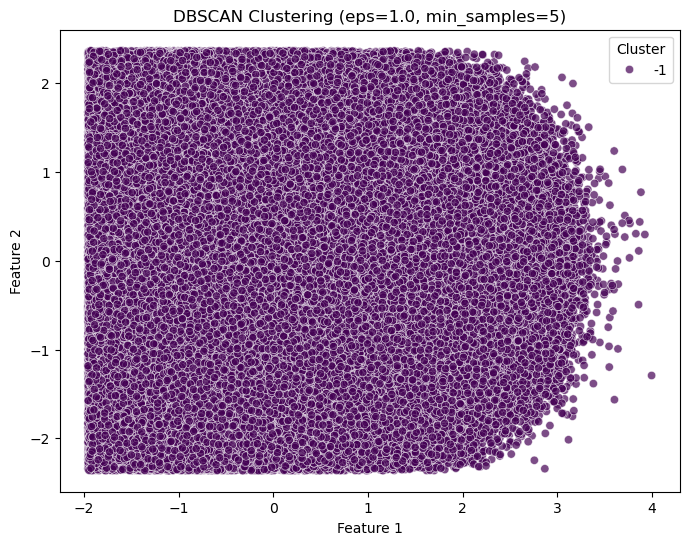

CPU times: user 7min 41s, sys: 21.2 s, total: 8min 2s
Wall time: 5min 31s


In [12]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.cluster import DBSCAN  # GPU-accelerated DBSCAN

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the datasets
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = all_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# ---------------------------
# 2. Apply DBSCAN Clustering
# ---------------------------
eps = 1.0  # Maximum distance between two samples for them to be in the same cluster
min_samples = 5  # Minimum number of points to form a dense region

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(features)

# ---------------------------
# 3. Add Cluster Labels
# ---------------------------
sample_data["Cluster"] = cluster_labels  # Assign clusters to the dataset

# ---------------------------
# 4. Visualize Clusters (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0].to_pandas(),  # First feature
                y=features.iloc[:, 1].to_pandas(),  # Second feature
                hue=cluster_labels.to_pandas(),
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.legend(title="Cluster")
plt.show()


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


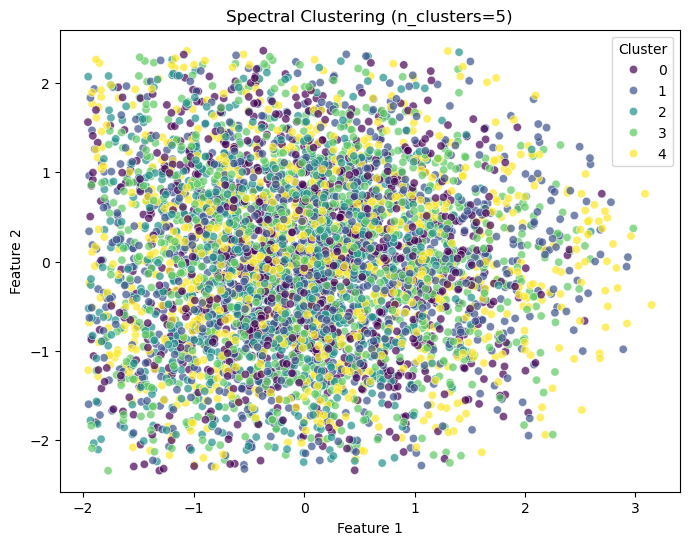

CPU times: user 15 s, sys: 2.59 s, total: 17.6 s
Wall time: 27.7 s


In [1]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering  # Using scikit-learn for spectral clustering

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the datasets
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = all_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# ---------------------------
# 2. Prepare a Smaller Sample for Spectral Clustering
# ---------------------------
# Spectral clustering can be heavy on memory/computation. Here, we select 5,000 points.
spectral_sample = features.iloc[:5000]
# Convert to a NumPy array (spectral clustering from scikit-learn works on CPU arrays)
spectral_sample_np = spectral_sample.to_pandas().values

# ---------------------------
# 3. Apply Spectral Clustering
# ---------------------------
n_clusters = 5  # Define the number of clusters you expect
spectral = SpectralClustering(n_clusters=n_clusters,
                              affinity="nearest_neighbors",
                              assign_labels="discretize",
                              random_state=42)
spectral_labels = spectral.fit_predict(spectral_sample_np)

# ---------------------------
# 4. Visualize Spectral Clustering Results (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spectral_sample.iloc[:, 0].to_pandas(),  # First feature
                y=spectral_sample.iloc[:, 1].to_pandas(),  # Second feature
                hue=spectral_labels,
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Spectral Clustering (n_clusters={n_clusters})")
plt.legend(title="Cluster")
plt.show()
